In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [17]:
def vis_image(image):
    f, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    plt.show()
    
def find_darkest_region(image, a, b):
    min_intensity = float('inf')
    darkest_rect = None
    
    height, width = image.shape[:2]
    
    for y in range(height):
        for x in range(width):
            x1 = max(0, x - a // 2)
            y1 = max(0, y - b // 2)
            x2 = min(width, x + a // 2)
            y2 = min(height, y + b // 2)
            
            region = image[y1:y2, x1:x2]
            average_intensity = np.mean(region)
            
            if average_intensity < min_intensity:
                min_intensity = average_intensity
                darkest_rect = (x1, y1)
                
    return darkest_rect

def dibujar_rectangulo(image, coordenada, dimensiones_a, dimensiones_b):
    cv2.rectangle(image, coordenada, (coordenada[0]+dimensiones_a, coordenada[1]+dimensiones_b), (0, 0, 255), 2)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

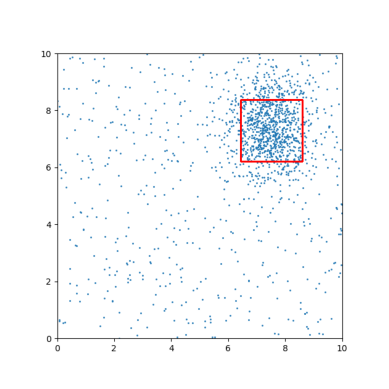

In [3]:
i = 1
image = cv2.imread(f'data/image_{i}.png')
darkest_rect = find_darkest_region(image, 100, 100)
dibujar_rectangulo(image, darkest_rect, 100, 100)

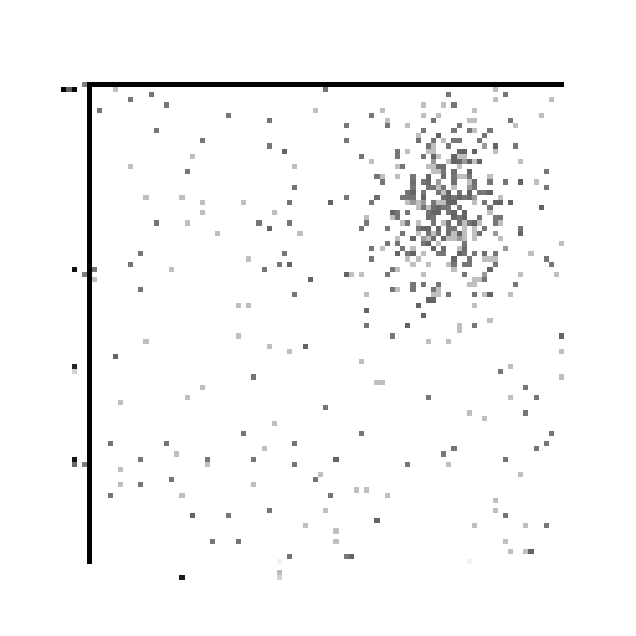

In [20]:

percent = 0.2

image = cv2.imread('data/image_1.png')
height, width = image.shape[:2]

grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(grayscale_image, (int(height * percent), int(width * percent)))

vis_image(resized_image)




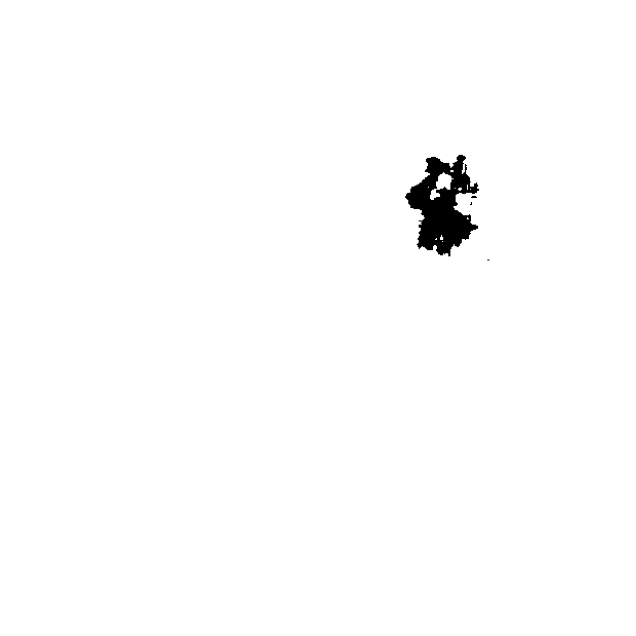

In [30]:
image = cv2.imread('data/image_1.png')
height, width = image.shape[:2]

grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, black_white_image = cv2.threshold(grayscale_image, 250, 255, cv2.THRESH_BINARY)
median = cv2.medianBlur(black_white_image, 15)

vis_image(median)

